Part One

Okay, this general problem is 2d bin packing, and it's HARD! But this one here is actually way simpler than it looks.

In [1]:
with open("input12.txt", "r") as f:
    content = f.readlines()

gift_areas = []
for i in range(6):
    gift_areas.append(sum([ch=="#" for l in content[5*i+1:5*i+4] for ch in l]))

regions = []
for line in content[30:]:
    WxL, presents = line.split(":")
    WxL = tuple(int(n) for n in WxL.split("x"))
    presents = tuple(int(n) for n in presents.strip().split())
    regions.append((*WxL,presents))

Let's start with some basic checks that don't require actual packing:\
i) compare total area needed for gifts with total available area, an infeasibility witness;\
ii) compare the simplest "blocky" packing (each gift in its 3x3 block) to the available blocky area, a feasiblity witness [note: rounding (width, height) down to multiples of three!].

The cases that don't fall in these two categories are the hard ones, which require a study on the actual packing.

In [2]:
n_fit, n_not_fit, hard_cases = 0, 0, []
for w,l,presents in regions:
    available = 9*(w//3)*(l//3)
    needed_blocky = 9*sum(presents)
    if available >= needed_blocky:
        n_fit+=1
        continue
    sum_gift_area = sum(a*p for a,p in zip(gift_areas,presents))
    if w*l <= sum_gift_area:
        n_not_fit+=1
    else:
        hard_cases.append((w,l,presents)) # tits the area, but not in blocks: we need to know the actual packing")
n_fit, n_not_fit, hard_cases

(546, 454, [])

And none of the cases is hard (unlike in the example...)

Other pointers to the ease of the problem: the available/needed area ratio was either below one (infeasible) or well above one (1.35 at least). This is larger than the corresponding ratio for each gift most of the time

In [3]:
#area check
n_area_feasible, min_feas_ratio = 0, 2
for w,l,presents in regions:
    sum_gift_area = sum(a*p for a,p in zip(gift_areas,presents))
    if w*l >= sum_gift_area:
        # print("Feasible by area", w,l,presents, w*l, sum_gift_area, w*l/sum_gift_area)
        n_area_feasible+=1
        min_feas_ratio = min(min_feas_ratio, w*l/sum_gift_area)
print(f"Area-feasible instances: {n_area_feasible}\nmin area ratio (feasibles): {float(min_feas_ratio)}\nratios per gift: {[9/a for a in (gift_areas)]}")

Area-feasible instances: 546
min area ratio (feasibles): 1.3570836785418392
ratios per gift: [1.2857142857142858, 1.5, 1.2857142857142858, 1.8, 1.2857142857142858, 1.2857142857142858]


So there we have it. Now a nice plot of all the shapes, which became completely irrelevant given how the problem is setup

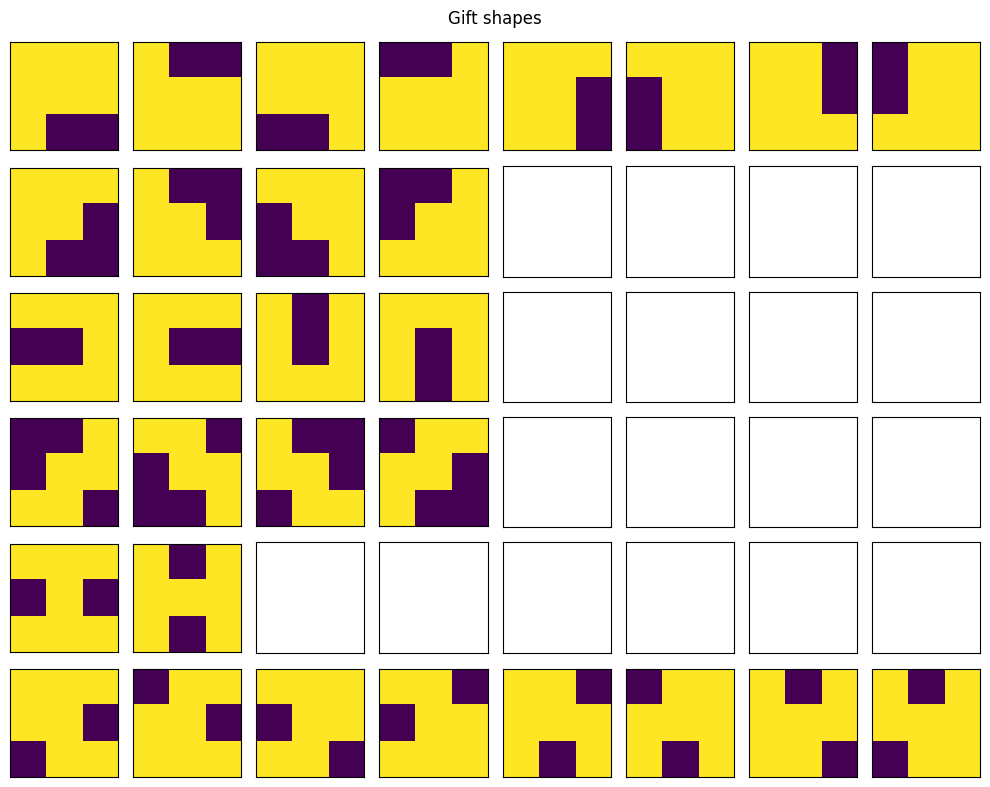

In [4]:
import numpy as np
np.set_printoptions(linewidth=np.inf)

gift_shapes = []
for i in range(6):
    shape = np.array([[ch=="#" for ch in l.strip("\n")] for l in content[5*i+1:5*i+4]])
    symmetries = [shape]
    for next_shape in [shape[::-1], shape[:,::-1], shape[::-1,::-1], shape.T, shape[::-1].T, shape[:,::-1].T, shape[::-1,::-1].T]:
        if not any(np.array_equal(next_shape, g) for g in symmetries):
            symmetries.append(next_shape);
    gift_shapes.append(symmetries)
gift_areas = [np.sum(gift_shapes[i][0]) for i in range(len(gift_shapes))]

import matplotlib.pyplot as plt

fig, axes = plt.subplots(6,8, figsize=(10,8))
for i,shape in enumerate(gift_shapes):
    for j, gift in enumerate(shape):
        axes[i,j].matshow(gift)
        axes[i,j].set_xticks([]);axes[i,j].set_yticks([])
    for j in range(len(shape),len(axes[i])):
        axes[i,j].set_xticks([]);axes[i,j].set_yticks([])
plt.suptitle("Gift shapes")
fig.tight_layout();